In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import os
import plotly.express as px
from wordcloud import WordCloud

In [2]:
pwd


'C:\\Users\\Blaise Hilary\\Documents'

In [3]:
os.chdir('C:\\Users\\Blaise Hilary\\Downloads')

In [4]:
pwd

'C:\\Users\\Blaise Hilary\\Downloads'

In [5]:
df = pd.read_csv('netflix_titles.csv')

In [6]:
df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
release_year,8807.0,2014.180198,8.819312,1925.0,2013.0,2017.0,2019.0,2021.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [9]:
(df.isnull().sum()/len(df))*100

show_id          0.000000
type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
description      0.000000
dtype: float64

In [10]:
df.shape

(8807, 12)

In [11]:
len(df)

8807

In [12]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [13]:
df.drop(['director','cast'], 1, inplace = True)

In [14]:
df

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [15]:
df_country =df.country.value_counts().sort_values(ascending = False).head(11)

In [16]:
df_country

United States     2818
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Turkey             105
Name: country, dtype: int64

In [17]:
pie =df.type.value_counts().to_frame()

In [18]:
pie

,type
Movie,6131
TV Show,2676


In [19]:
Type = ['Movie', 'TV Show']

([<matplotlib.patches.Wedge at 0x28aee61c948>,
 [Text(-0.6357552620136555, 0.897672126570692, 'Movie'),
  Text(0.6357552620136554, -0.8976721265706921, 'TV Show')])

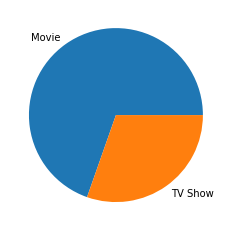

In [20]:
plt.pie(pie, explode = None, labels = Type)

In [21]:
len(df.type)

8807

In [22]:
len(df.rating.unique())

18

In [23]:
df.rating.unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

In [24]:
new_categories = {
    'TV-PG': 'Parental Guidance',
    'TV-MA': 'Mature Audience',
    'TV-Y7-FV': 'Teens',
    'TV-Y7': 'Teens',
    'TV-14': 'Teens',
    'R': 'Mature Audience',
    'TV-Y': 'General Audience',
    'NR': 'Mature Audience',
    'PG-13': 'Teens',
    'TV-G': 'General Audience',
    'PG': 'Teens',
    'G': 'General Audience',
    'UR': 'Mature Audience',
    'NC-17': 'Mature Audience'}
df.rating = df.rating.replace(new_categories)
df.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,United States,"September 25, 2021",2020,Teens,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,South Africa,"September 24, 2021",2021,Mature Audience,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,NaN,"September 24, 2021",2021,Mature Audience,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,"September 24, 2021",2021,Mature Audience,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,India,"September 24, 2021",2021,Mature Audience,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


Text(0.5, 1.0, 'Distrribution of movies and show')

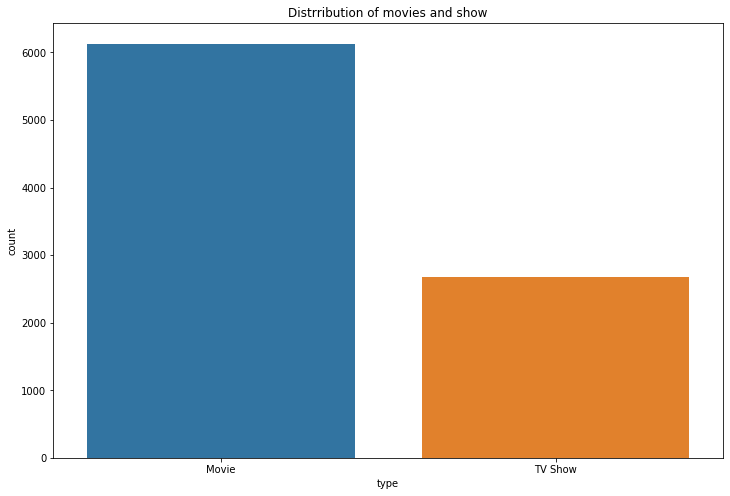

In [25]:
plt.figure(figsize = (12,8))
sns.countplot(x='type', data = df,)
plt.title('Distrribution of movies and show')

In [26]:
len(df.rating.unique())

8

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

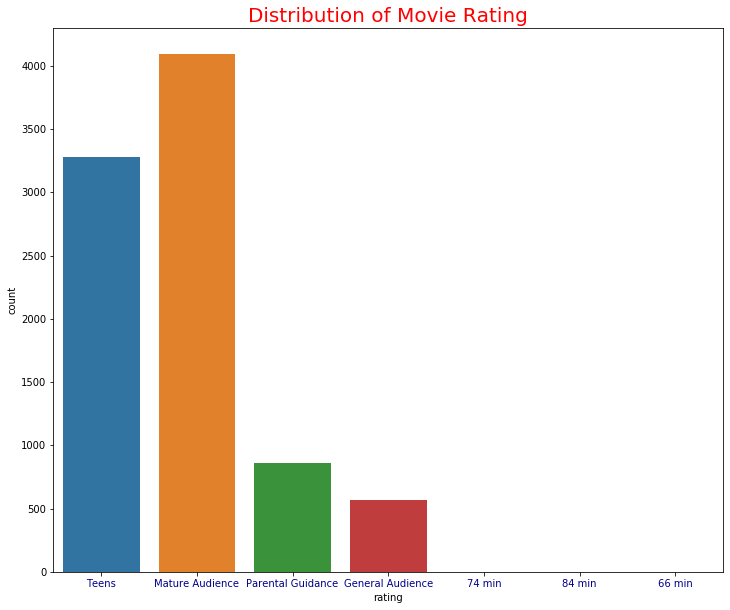

In [85]:
plt.figure(figsize = (12,10))
sns.countplot(x = 'rating', data =df)
plt.title('Distribution of Movie Rating', color = 'red', fontsize = 20)
plt.xticks(fontsize = 10, color = 'DarkBlue')


In [28]:
df.rating.value_counts().to_frame()

,rating
Mature Audience,4092
Teens,3277
Parental Guidance,863
General Audience,568
66 min,1
74 min,1
84 min,1


In [29]:
df10 = df

Text(0.5, 1.0, 'Movies Released per year')

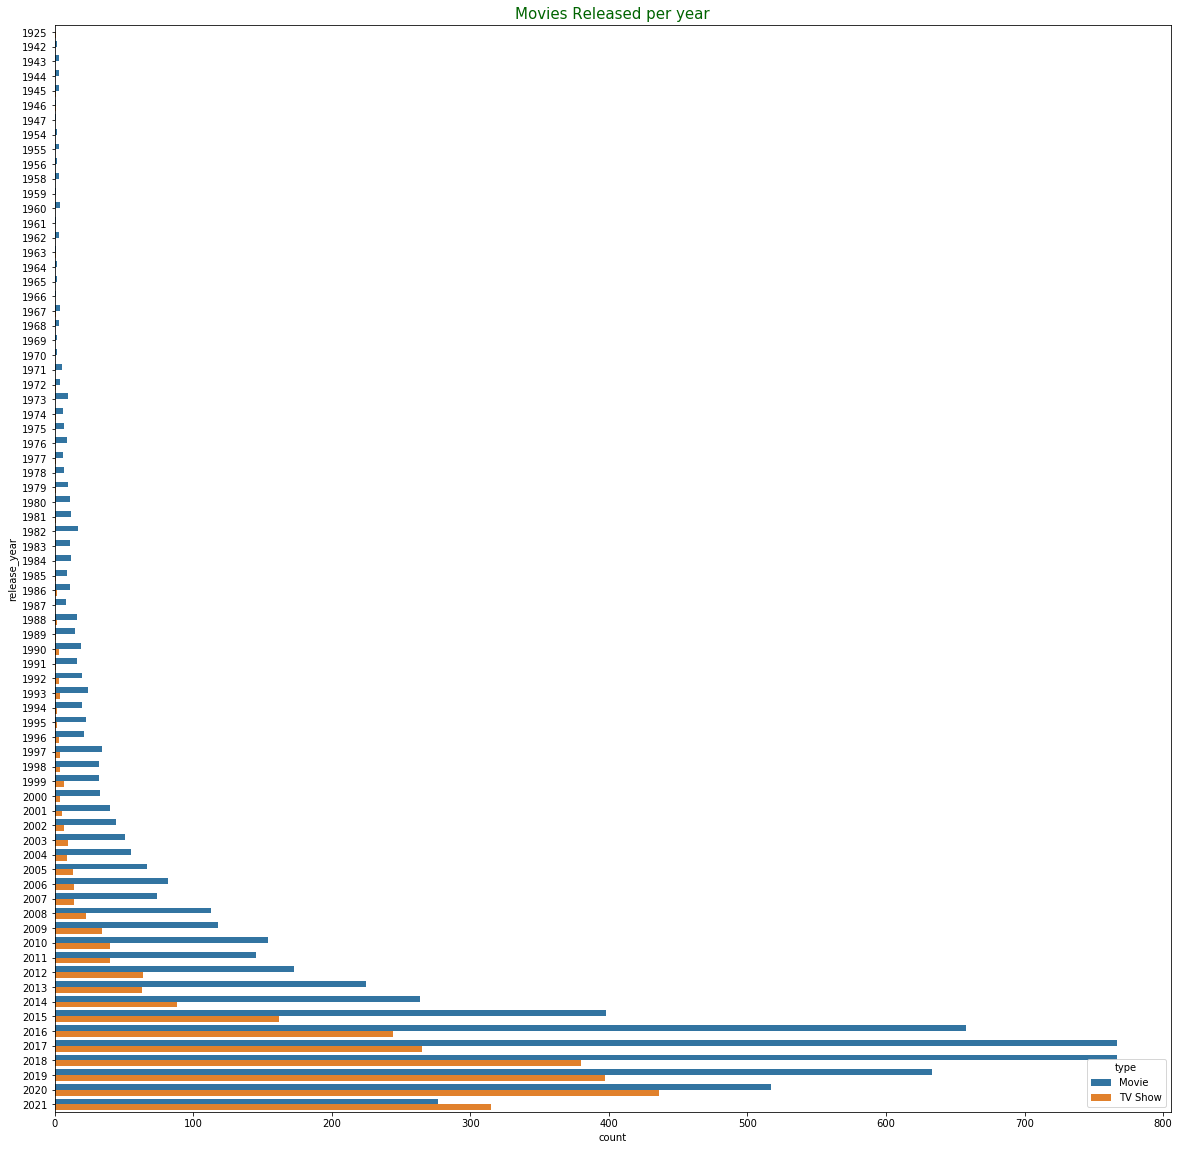

In [30]:
plt.figure(figsize = (20,20))
sns.countplot(y = 'release_year', data = df, hue = 'type')
plt.title('Movies Released per year', color ='DarkGreen', fontsize = 15)

In [31]:
dfm = df[df.type=='Movie']

In [32]:
dfm

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,United States,"September 25, 2021",2020,Teens,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,NaN,"September 24, 2021",2021,Teens,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,"United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,Mature Audience,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,United States,"September 24, 2021",2021,Teens,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,"Germany, Czech Republic","September 23, 2021",2021,Mature Audience,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,"United Arab Emirates, Jordan","March 9, 2016",2015,Mature Audience,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
8802,s8803,Movie,Zodiac,United States,"November 20, 2019",2007,Mature Audience,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8804,s8805,Movie,Zombieland,United States,"November 1, 2019",2009,Mature Audience,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,United States,"January 11, 2020",2006,Teens,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [33]:
topmovies = df[df.type == 'Movie']['listed_in'].value_counts()[:5].to_frame().reset_index()

In [34]:
topmovies.columns = ['genre', 'count']

In [35]:
topmovies

,genre,count
0,"Dramas, International Movies",362
1,Documentaries,359
2,Stand-Up Comedy,334
3,"Comedies, Dramas, International Movies",274
4,"Dramas, Independent Movies, International Movies",252


In [36]:
topgenres = df[df.type == 'TV Show']['listed_in'].value_counts()[:5].to_frame().reset_index()

In [37]:
topgenres.columns = ['genre','count']

In [38]:
topgenres

,genre,count
0,Kids' TV,220
1,"International TV Shows, TV Dramas",121
2,"Crime TV Shows, International TV Shows, TV Dramas",110
3,"Kids' TV, TV Comedies",99
4,Reality TV,95


(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

findfont: Font family ['Open Sans'] not found. Falling back to DejaVu Sans.


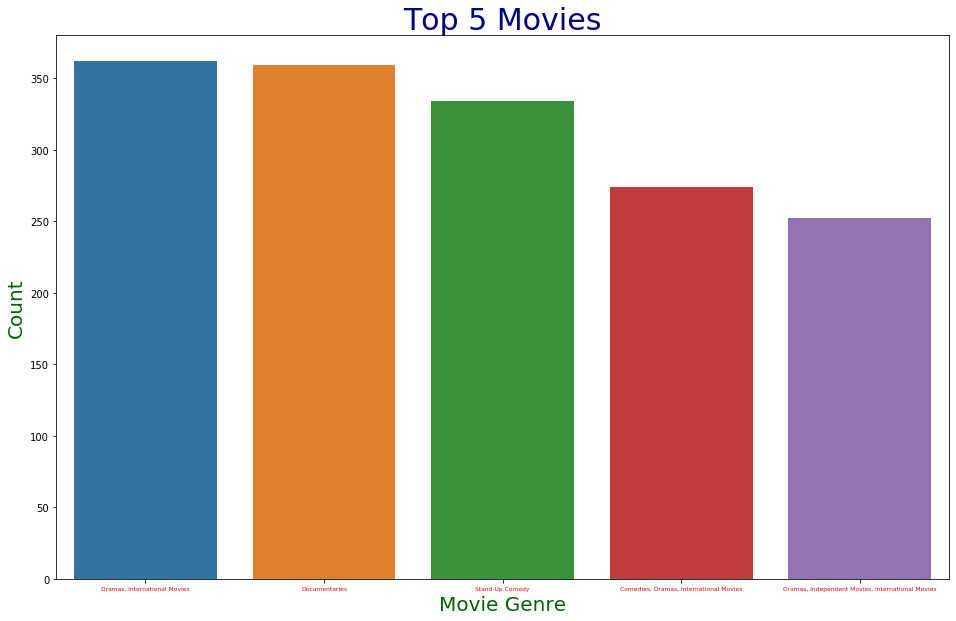

In [39]:
plt.figure(figsize = (16,10))
sns.barplot(x = topmovies['genre'], y = topmovies['count'])
plt.title( 'Top 5 Movies', fontsize = 30, color = 'darkblue')
plt.xlabel('Movie Genre', fontsize = 20, fontname = 'Open Sans', color ='darkgreen')
plt.ylabel('Count', fontsize = 20, fontname = 'Open Sans', color ='darkgreen')
plt.xticks(fontsize = 6, color = 'red')

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

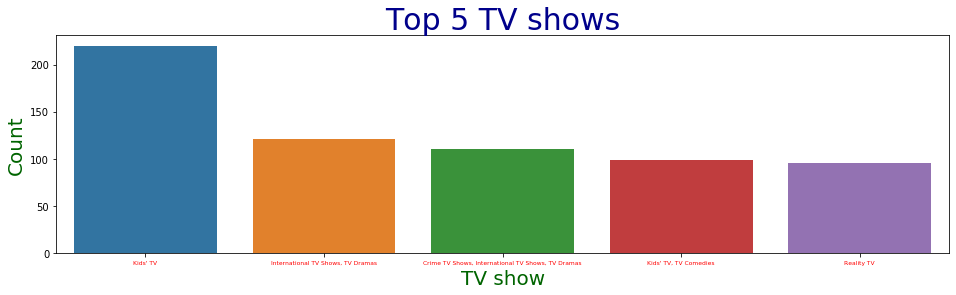

In [40]:
plt.figure(figsize = (16,4))
sns.barplot(x = topgenres['genre'], y = topgenres['count'])
plt.title( 'Top 5 TV shows', fontsize = 30, color = 'darkblue')
plt.xlabel('TV show', fontsize = 20, fontname = 'Open Sans', color ='darkgreen')
plt.ylabel('Count', fontsize = 20, fontname = 'Open Sans', color ='darkgreen')
plt.xticks(fontsize = 6, color = 'red')

In [41]:
df[df.type == 'Movie'].country.dropna()

0                                           United States
7       United States, Ghana, Burkina Faso, United Kin...
9                                           United States
12                                Germany, Czech Republic
24                                                  India
                              ...                        
8801                         United Arab Emirates, Jordan
8802                                        United States
8804                                        United States
8805                                        United States
8806                                                India
Name: country, Length: 5691, dtype: object

In [42]:
from collections import Counter

In [43]:
topcountry = df[df.type == 'Movie']['country'].value_counts()[:5].to_frame().reset_index()

In [44]:
topcountry

,index,country
0,United States,2058
1,India,893
2,United Kingdom,206
3,Canada,122
4,Spain,97


In [45]:
topcountry.columns = ['country','counts']

In [46]:
topcountry

,country,counts
0,United States,2058
1,India,893
2,United Kingdom,206
3,Canada,122
4,Spain,97


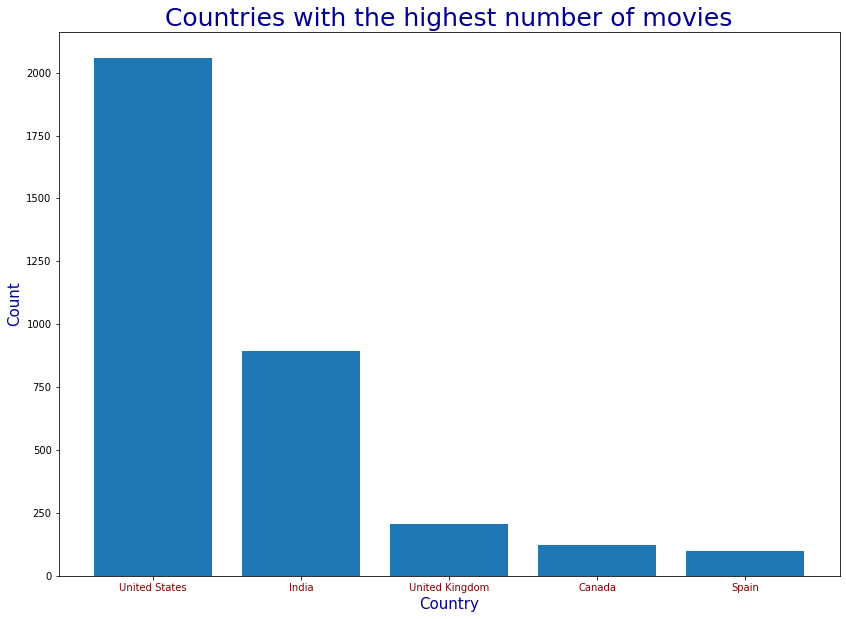

In [47]:
plt.figure(figsize = (14,10))
plt.bar(x = topcountry['country'], height = topcountry['counts'])
plt.title('Countries with the highest number of movies', fontsize = 25,color = 'darkblue')
plt.xlabel('Country', fontsize = 15, color = 'Darkblue')
plt.ylabel('Count', fontsize = 15, color = 'Darkblue')
plt.xticks(fontsize = 10, color = 'maroon')
plt.show()

In [48]:

countries_movies = []
for i in df[df.type == 'Movie'].country.dropna():
    countries_movies.append(i)

In [49]:
counter = Counter(countries_movies)

In [50]:
counter

Counter({'United States': 2058,
         'United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia': 1,
         'Germany, Czech Republic': 1,
         'India': 893,
         'United States, India, France': 1,
         'China, Canada, United States': 3,
         'South Africa, United States, Japan': 1,
         'Japan': 76,
         'Nigeria': 86,
         'Spain, United States': 1,
         'France': 75,
         'United Kingdom, United States': 63,
         'United Kingdom, Australia, France': 1,
         'United Kingdom, Australia, France, United States': 1,
         'United States, Canada': 51,
         'Germany, United States': 12,
         'South Africa, United States': 4,
         'United States, Mexico': 11,
         'United States, Italy, France, Japan': 1,
         'United States, Italy, Romania, United Kingdom': 1,
         'Australia, United States': 10,
         'Argentina, Venezuela': 1,
         'United States, United Kingdom, Canada': 2,
         'China, Ho

In [67]:
top5 = df[df.type == 'Movie']['country'].dropna().to_frame().reset_index()

In [68]:
top5

,index,country
0,0,United States
1,7,"United States, Ghana, Burkina Faso, United Kin..."
2,9,United States
3,12,"Germany, Czech Republic"
4,24,India
...,...,...
5686,8801,"United Arab Emirates, Jordan"
5687,8802,United States
5688,8804,United States
5689,8805,United States


In [69]:
top5.columns = ['S/N', 'country']

In [70]:
top5

,S/N,country
0,0,United States
1,7,"United States, Ghana, Burkina Faso, United Kin..."
2,9,United States
3,12,"Germany, Czech Republic"
4,24,India
...,...,...
5686,8801,"United Arab Emirates, Jordan"
5687,8802,United States
5688,8804,United States
5689,8805,United States


In [77]:
top5.nlargest(15, 'S/N')

,S/N,country
5690,8806,India
5689,8805,United States
5688,8804,United States
5687,8802,United States
5686,8801,"United Arab Emirates, Jordan"
5685,8799,India
5684,8798,India
5683,8794,"Egypt, France"
5682,8793,United States
5681,8792,Hong Kong


In [72]:
wordcloud = WordCloud(width = 2000, height = 1000).generate_from_frequencies(counter)

Text(0.5, 1.0, 'Volume of Movie Production by Country')

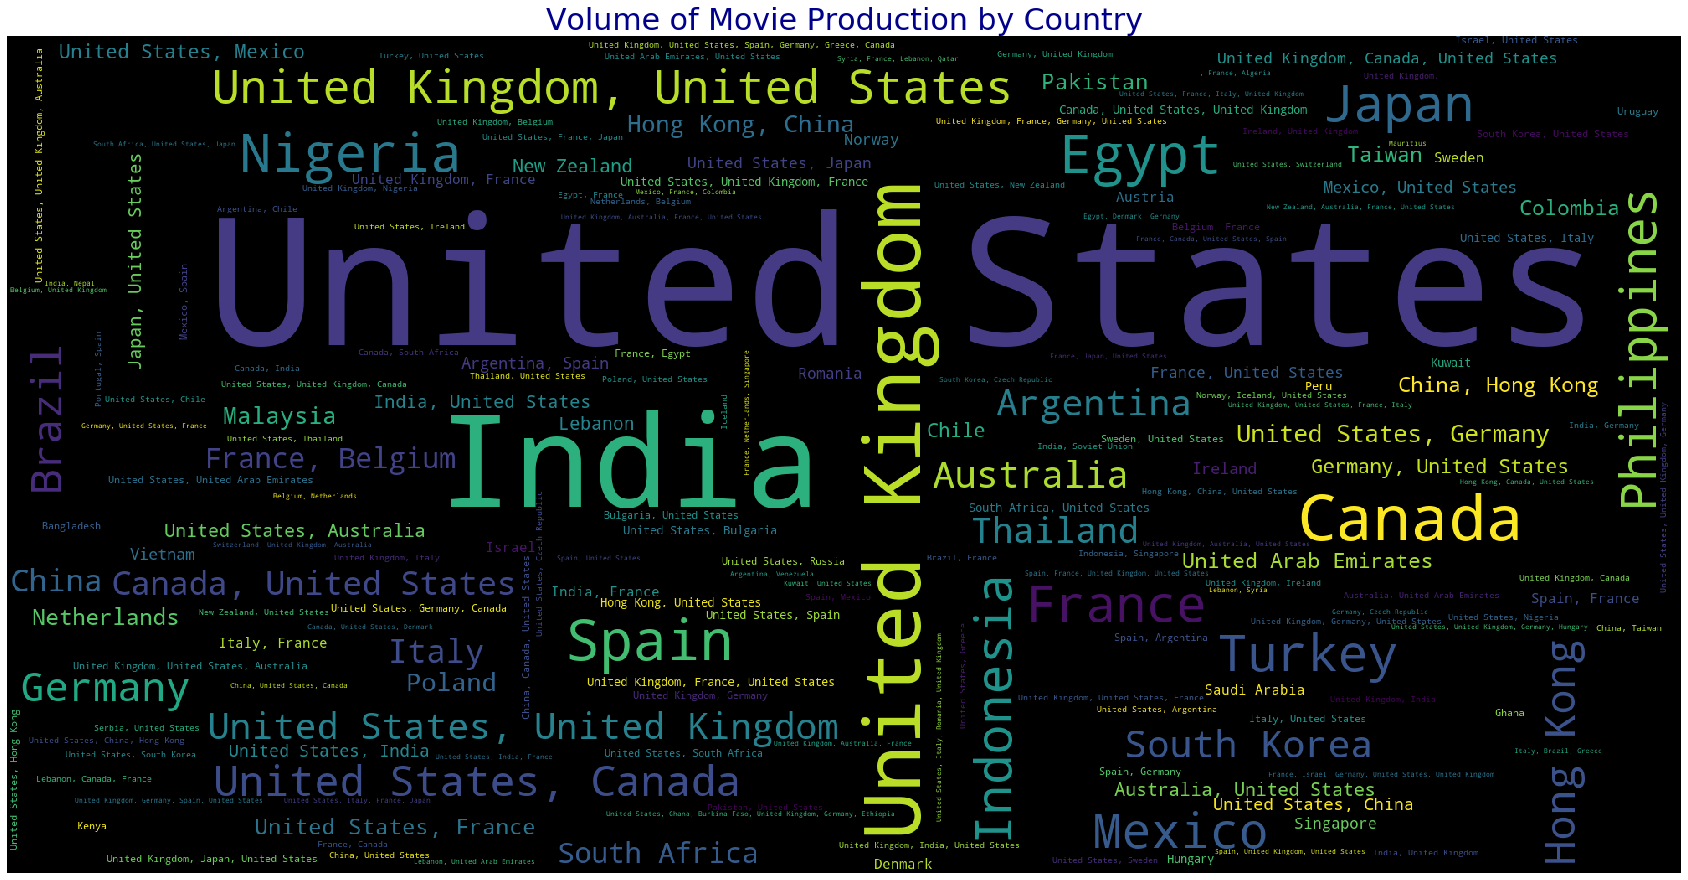

In [82]:
countries_movies = []
for i in df[df.type == 'Movie'].country.dropna():
    countries_movies.append(i)
counter = Counter(countries_movies)
wordcloud = WordCloud(width = 2000, height = 1000).generate_from_frequencies(counter)

plt.figure(figsize=(30,20))
plt.axis("off")
plt.imshow(wordcloud)
plt.title("Volume of Movie Production by Country", fontsize = 30, color = 'darkblue')

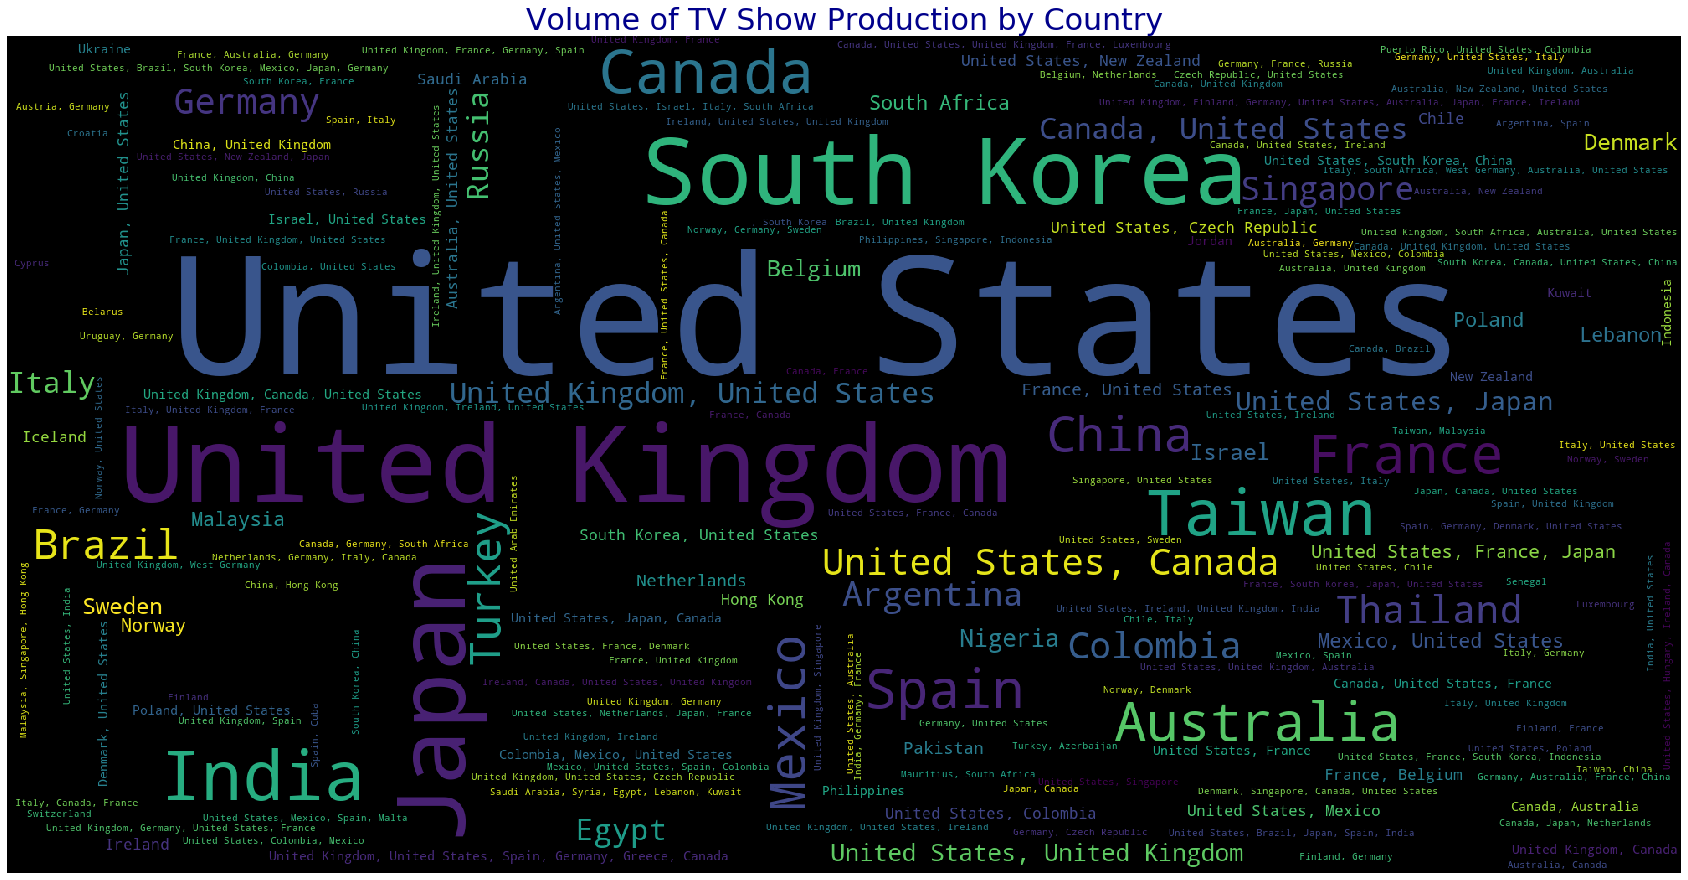

In [84]:
country_TV_Shows = []
for i in df[df.type == 'TV Show'].country.dropna():
    country_TV_Shows.append(i)
    
counter = Counter(country_TV_Shows)
wordcloud = WordCloud(width = 2000, height = 1000).generate_from_frequencies(counter)

plt.figure(figsize = (30,20))
plt.axis('off')
plt.imshow(wordcloud)
plt.title('Volume of TV Show Production by Country', fontsize = 30, color = 'darkblue')
plt.show()